<a href="https://colab.research.google.com/github/Harini240/Harini240/blob/main/naive_bayesian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [8]:
data=pd.read_csv('/content/Cleanest_Cities_India.csv')
print(data)

         City Name  2023_Score_Max10000  2022_Score_Max7500  \
0           INDORE              9348.39             7146.41   
1            SURAT              9348.39             6924.84   
2      NAVI MUMBAI              9240.30             6852.91   
3    VISAKHAPATNAM              8879.30             6701.18   
4           BHOPAL              8855.20             6608.41   
..             ...                  ...                 ...   
554       Siddipet                 0.00                0.00   
555        Sitapur                 0.00                0.00   
556          Tifra                 0.00                0.00   
557         Tirupa                 0.00                0.00   
558        Udaipur                 0.00                0.00   

     2020_Score_Max6000  2019_Score_5000  2018_Score  2017_Score  2016_Score  
0               5647.56             4659        3707        1808        1276  
1               5519.59             3861        3318        1762        1605  
2     

In [9]:
data.head()

,City Name,2023_Score_Max10000,2022_Score_Max7500,2020_Score_Max6000,2019_Score_5000,2018_Score,2017_Score,2016_Score
0,INDORE,9348.39,7146.41,5647.56,4659,3707,1808,1276
1,SURAT,9348.39,6924.84,5519.59,3861,3318,1762,1605
2,NAVI MUMBAI,9240.30,6852.91,5467.89,4129,3536,1705,1530
3,VISAKHAPATNAM,8879.30,6701.18,4918.44,3744,3547,1797,1643
4,BHOPAL,8855.20,6608.41,5066.31,3794,3689,1800,1336


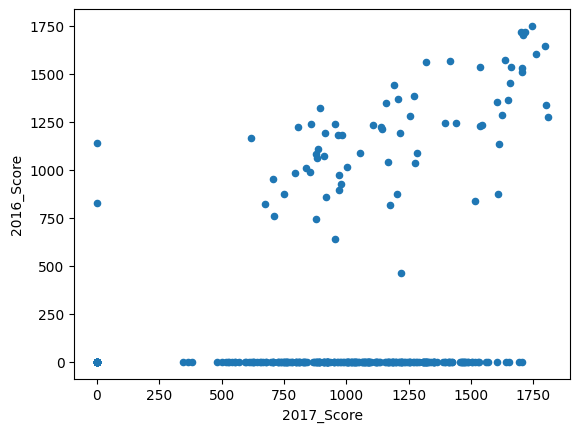

In [10]:
data.plot.scatter(x='2017_Score',y='2016_Score');

In [14]:
data.shape


(559, 8)

In [16]:
x=data['2017_Score'].values.reshape(-1,1)
y=data['2016_Score'].values.reshape(-1,1)#depending

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 30)

In [18]:
print(x_train)
print(y_train)

[[1277]
 [   0]
 [   0]
 [ 642]
 [   0]
 [   0]
 [   0]
 [   0]
 [1271]
 [   0]
 [   0]
 [   0]
 [   0]
 [1479]
 [   0]
 [1348]
 [   0]
 [   0]
 [1407]
 [1010]
 [1313]
 [1255]
 [   0]
 [ 892]
 [1007]
 [ 922]
 [   0]
 [ 760]
 [   0]
 [1333]
 [   0]
 [   0]
 [   0]
 [ 911]
 [1161]
 [ 949]
 [1062]
 [   0]
 [   0]
 [ 970]
 [   0]
 [   0]
 [ 654]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [ 530]
 [1797]
 [   0]
 [1394]
 [   0]
 [1464]
 [   0]
 [   0]
 [1603]
 [   0]
 [ 731]
 [ 756]
 [1158]
 [   0]
 [   0]
 [1220]
 [   0]
 [   0]
 [1650]
 [1117]
 [   0]
 [1061]
 [   0]
 [ 887]
 [1201]
 [1223]
 [   0]
 [ 968]
 [1073]
 [1320]
 [ 676]
 [ 657]
 [1468]
 [ 610]
 [   0]
 [1422]
 [1613]
 [ 760]
 [1003]
 [   0]
 [ 782]
 [   0]
 [   0]
 [ 954]
 [   0]
 [   0]
 [   0]
 [1250]
 [1072]
 [1022]
 [1142]
 [1040]
 [   0]
 [ 619]
 [   0]
 [   0]
 [   0]
 [ 827]
 [ 914]
 [ 951]
 [   0]
 [   0]
 [1545]
 [   0]
 [1187]
 [   0]
 [1017]
 [1283]
 [1189]
 [1169]
 [   0]
 [   0]
 [   0]
 [   0]
 [1486]
 [ 598]
 [1020]


In [19]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()


In [22]:
regressor.fit(x_train,y_train)

LinearRegression()

In [23]:
y_pred = regressor.predict(x_test)

In [24]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

     Actual   Predicted
0         0  -19.612834
1      1090  270.476597
2         0  -19.612834
3         0  317.860626
4         0  185.626127
..      ...         ...
107       0  -19.612834
108       0  -19.612834
109       0  -19.612834
110       0  -19.612834
111    1715  453.125499

[112 rows x 2 columns]


In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [26]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 221.69
Mean squared error: 131194.26
Root mean squared error: 362.21


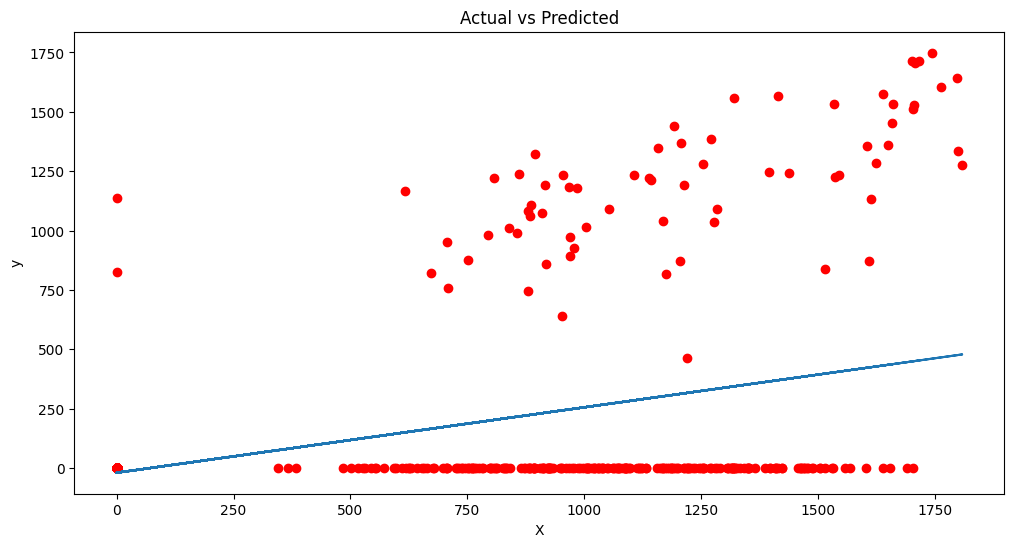

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(x,y,'ro')     # regression line
plt.plot(x_test,y_pred)   # scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.show()